# <center>Best market for e-learning advertising</center>

This is an analysis of computer science job market based on FreeCodeCamp's survey filled by over 15,000 developers. The purpose of this work is to find the best market (country) to target advertising for Computer Science e-learning platform

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
survey = pd.read_csv('survey_data.csv')
survey.head()

/Users/Maciek/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
survey.shape

(18175, 136)

In [4]:
survey.columns[51:70]

Index(['IsUnderEmployed', 'JobApplyWhen', 'JobInterestBackEnd',
       'JobInterestDataEngr', 'JobInterestDataSci', 'JobInterestDevOps',
       'JobInterestFrontEnd', 'JobInterestFullStack', 'JobInterestGameDev',
       'JobInterestInfoSec', 'JobInterestMobile', 'JobInterestOther',
       'JobInterestProjMngr', 'JobInterestQAEngr', 'JobInterestUX', 'JobPref',
       'JobRelocateYesNo', 'JobRoleInterest', 'JobWherePref'],
      dtype='object')

This is a dataset from a survey conducted by FreeCodeCamp and filled by over 15,000 developers. This survey asks basic questions about background, preferences, interests, skills, earnings of developers. It can prove very useful in achieving uor goal of finding two best markets for advertising Computer Science e-learning platform. This is a reason why I've decided to use this dataset instead of conducting my own survey, it is also much cheaper and takes less time to finish. The dataset can be downloaded [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [5]:
#checking if the sample is representative, creating frequency distribution sample of 'JobRoleInterest' column
frequency_dist = survey['JobRoleInterest'].value_counts(normalize=True) * 100
frequency_dist

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

In [6]:
#calculating how many of the Job Roles in the columns are conected to Web or Mobile development
frequency_dist[frequency_dist.index.str.contains('Web|Mobile')].sum()

86.29862700228833

In [7]:
#calculating number of indexes with more than one role of interest
frequency_dist[frequency_dist.index.str.contains(',')].count()/len(frequency_dist.index)


0.9651416122004357

Above we can see that most people are interested in more than one subject, in fact almost all of the respondents are (over 96%), 86% of responders are interested in Web or Mobile development so that is a very good sample for our analysis.

In [8]:
one_role = frequency_dist[frequency_dist.index.str.contains(',') == False].count()


In [9]:
two_roles = frequency_dist[frequency_dist.index.str.contains(',')].count() - frequency_dist[frequency_dist.index.str.contains(',.*,')].count()

In [10]:
three_roles = frequency_dist[frequency_dist.index.str.contains(',.*,.*,')].count() - frequency_dist[frequency_dist.index.str.contains(',.*,.*,.*,')].count()

In [11]:
four_and_more_roles = frequency_dist[frequency_dist.index.str.contains(',.*,.*,.*,')].count()

In [12]:
num_roles_wanted = pd.DataFrame(index=[1,2,3, 4], data=[one_role, two_roles, three_roles, four_and_more_roles])

In [13]:
num_roles_wanted[1] = ['one role', 'two roles', 'three roles', 'four or more roles']

In [14]:
num_roles_wanted

,0,1
1,112,one role
2,119,two roles
3,755,three roles
4,1785,four or more roles


Text(0.5, 1.0, 'Distribution of the number of roles each developer is interested in')

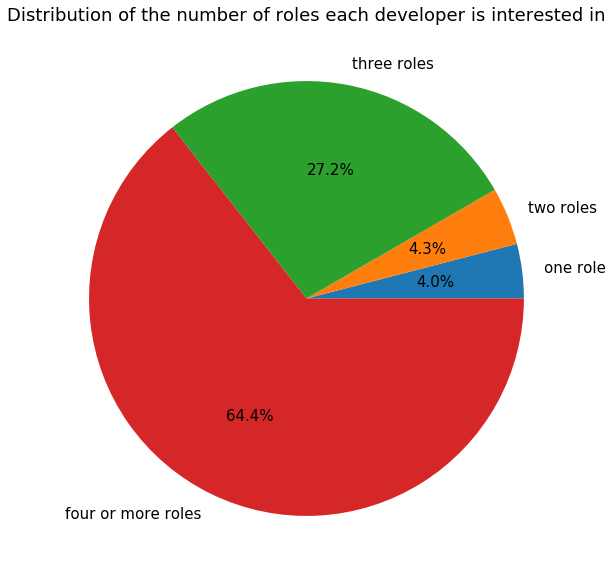

In [15]:
font = {
        'size'   : 15
       }

plt.rc('font', **font)
plt.figure(figsize=(10,10))
plt.pie(x=num_roles_wanted[0], labels=num_roles_wanted[1], autopct='%.1f%%')
plt.title('Distribution of the number of roles each developer is interested in')

Most of programmers are interested in more than three roles.

In [16]:
#Dropping missing values from JobRoleInterest column since these rows are of no use and lack of them should not bring any harm
survey.dropna(subset=['JobRoleInterest'], inplace=True)

In [17]:
survey['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Croatia     

In [18]:
survey['CountryLive'].value_counts(normalize=True)

United States of America         0.457005
India                            0.077216
United Kingdom                   0.046066
Canada                           0.038023
Poland                           0.019158
Brazil                           0.018865
Germany                          0.018280
Australia                        0.016379
Russia                           0.014917
Ukraine                          0.013016
Nigeria                          0.012284
Spain                            0.011261
France                           0.010968
Romania                          0.010383
Netherlands (Holland, Europe)    0.009506
Italy                            0.009067
Serbia                           0.007605
Philippines                      0.007605
Greece                           0.006727
Ireland                          0.006288
South Africa                     0.005703
Mexico                           0.005411
Turkey                           0.005265
Hungary                          0

Countries were most  new programmers seem to Live are United States (45% of all coders), India (7.7%), the UK (4.6%), Canada (3.8%). These countries are probably the best markets to advertise in. Also these are (for the most part, at least) english speaking countries, which is a language our platform is build on.

In [19]:
#replacing all values 0 to 1 to avoid dividing by zero
survey['MonthsProgramming'].replace(0,1, inplace=True)
survey['MoneySpent'] = survey['MoneyForLearning'] / survey['MonthsProgramming']

In [20]:
survey['MoneySpent'].isnull().count()

6992

In [21]:
survey[['MoneySpent', 'CountryLive']].dropna(inplace=True)

/Users/Maciek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
group_mean = survey.groupby('CountryLive')['MoneySpent'].agg(np.mean).sort_values(ascending=False)
group_mean[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpent, dtype: float64

Among four countries chosen earlier, average money spent on learning per month is the highest in the US, followed by India and Canada. The UK has a very low figure, which seems even false. Even Canada has a low value, at least relative to India, which is significantly poorer than those two countries. 

Text(0.5, 1.0, 'Money spent per month per country')

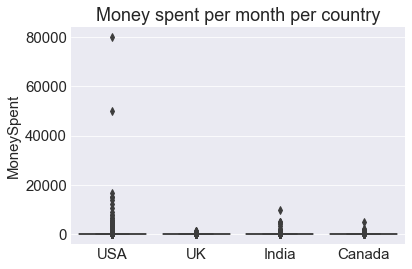

In [23]:
four_countries = survey[(survey['CountryLive'] == 'United States of America') | (survey['CountryLive'] == 'India') | (survey['CountryLive'] == 'United Kingdom') | (survey['CountryLive'] == 'Canada')]

import seaborn as sns
plt.style.use('seaborn-darkgrid')
sns.boxplot(x='CountryLive', y='MoneySpent', data=four_countries)
plt.xticks(ticks=[0,1,2,3],labels=['USA', 'UK', 'India', 'Canada'])
plt.xlabel('')
plt.title('Money spent per month per country')



There are a lot of outliers in each country. It would be best to remove them, so they do not influence the outcome of the analysis. Good way to do this can be throwing away all values higher than 20 times interquartile range.

# Change the method of removing outliers

Text(0.5, 1.0, 'Money spent per month per country (no outliers)')

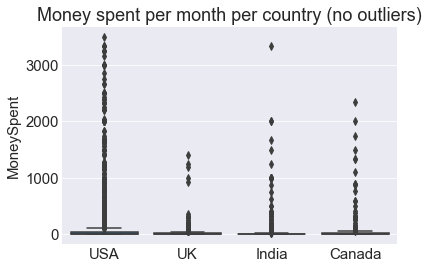

In [43]:
q = (four_countries['MoneySpent'].quantile(.75) - four_countries['MoneySpent'].quantile(.25)) * 100
no_outliers = four_countries[np.abs(four_countries['MoneySpent']) < q]
sns.boxplot(x='CountryLive', y='MoneySpent', data=no_outliers)
plt.xticks(ticks=[0,1,2,3],labels=['USA', 'UK', 'India', 'Canada'])
plt.xlabel('')
plt.title('Money spent per month per country (no outliers)')

In [44]:
no_outliers.groupby('CountryLive')['MoneySpent'].agg(np.mean)



CountryLive
Canada                       93.065400
India                        72.893205
United Kingdom               45.534443
United States of America    119.306296
Name: MoneySpent, dtype: float64

After removing outliers (in a extreme arbitrary way) we can see a more down-to-earth picture. USA still seems like the best market, followed by Canada.

At this point it seems rather obvious that we should choose the US as our market for advertising, it is both big and wealthy, with a big number of new coders and high propensity to spend a lot on learning.
<br>
Then, countries our company can choose is India or Canada. 
India is a rapidly developing country, with vast supply of people that are willing to pay for their education.
<br>
Canada, on the other hand, is much more wealthy than India, it is close to the US.
